In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as  plt
import json
import yfinance as yf

# Analysis: Sentiment - Popularity - Stock Price Relation 

In [ ]:
### import packages
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import matplotlib.pyplot as  plt
import json
import yfinance as yf

## Bullish rate / Message Count - stock price relation

In [2]:
df = pd.read_csv('E:\\analysis_data\\have_symbol_big.csv').drop(columns = ['Unnamed: 0','symbol_list','sym_number'])

In [3]:
df = df.loc[(df['created_at']<='2022-12-31')]

In [18]:
sym_rank = pd.read_csv('E:\\analysis_data\\symbol_ranks.csv')

In [21]:
t20 = sym_rank.head(20)['symbol']
sym_rank.head(20)

,Unnamed: 0,rank_by_mes_count,symbol,rank_by_month,rank_diff
0,0,0,SPY,0,0
1,1,1,AMC,23,-22
2,2,2,AAPL,1,1
3,3,3,TSLA,2,1
4,4,4,BTC.X,10,-6
5,5,5,DOGE.X,31,-26
6,6,6,AMD,9,-3
7,7,7,OCGN,29,-22
8,8,8,NIO,16,-8
9,9,9,AMZN,3,6


In [22]:
import yfinance as yf

# Define your list of tickers
tickers = t20
# Replace ".X" with "-USD" in tickers
tickers_yfinance = [ticker.replace(".X", "-USD") for ticker in tickers]

# Initialize an empty list to store DataFrames for each ticker
dfs = []

# Fetch data for each ticker
for ticker, yf_ticker in zip(tickers, tickers_yfinance):
    try:
        df = yf.download(yf_ticker, start="2018-01-01", end="2022-12-31")
        df = df.reset_index()
        df['ticker'] = ticker
        df = df[['ticker', 'Date', 'Adj Close']]
        df.columns = ['ticker', 'date', 'price']
        dfs.append(df)
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Concatenate the DataFrames into a single DataFrame
t20_price = pd.concat(dfs, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
# # Convert 'created_at' to datetime
# df['created_at'] = pd.to_datetime(df['created_at'])

# # Group by 'created_at' and 'symbol'
# grouped = df.groupby(['created_at', 'symbol']).agg(
#     message_count=('message_id', 'count'),
#     bullish_count=('sentiment', lambda x: (x == 1).sum()),
#     bearish_count=('sentiment', lambda x: (x == -1).sum())
# ).reset_index()

# # Calculate the bullish rate
# #grouped['bullish_rate'] = grouped['bullish_count'] / grouped['message_count']


In [5]:
# grouped['sent_count'] = grouped['bearish_count']+grouped['bullish_count']
# grouped['no_sent_count'] = grouped['message_count'] - grouped['sent_count']

In [10]:
#grouped = grouped.drop(columns = 'bullish_rate')
#grouped.to_csv('E:\\analysis_data\\sentiment_count.csv')
grouped = pd.read_csv('E:\\analysis_data\\sentiment_count.csv')
grouped = grouped.loc[grouped['created_at']>='2018-01-01']

In [33]:
use = grouped.loc[grouped['symbol'].isin(t20)]

In [34]:
use.head()

,Unnamed: 0,created_at,symbol,message_count,bullish_count,bearish_count,sent_count,no_sent_count
5189326,5189326,2018-01-01,AAPL,125,36,9,45,80
5189440,5189440,2018-01-01,AMC,52,19,6,25,27
5189444,5189444,2018-01-01,AMD,126,44,1,45,81
5189465,5189465,2018-01-01,AMZN,47,12,1,13,34
5189602,5189602,2018-01-01,BB,54,13,0,13,41


In [35]:
use['created_at'] = pd.to_datetime(use['created_at'])
use.set_index('created_at', inplace=True)

# Define the columns to sum
count_columns = ['message_count', 'bullish_count', 'bearish_count', 'sent_count', 'no_sent_count']

# Resample by 10-day intervals and sum the counts, then reset the index
resampled_df = use.groupby('symbol').resample('10D').sum().reset_index()

C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\3075560658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use['created_at'] = pd.to_datetime(use['created_at'])
C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\3075560658.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = use.groupby('symbol').resample('10D').sum().reset_index()


In [37]:
# Calculate rates
resampled_df['bull_rate'] = resampled_df['bullish_count'] / resampled_df['message_count']
resampled_df['bear_rate'] = resampled_df['bearish_count'] / resampled_df['message_count']

In [38]:
resampled_df.head()

,symbol,created_at,Unnamed: 0,message_count,bullish_count,bearish_count,sent_count,no_sent_count,bull_rate,bear_rate
0,AAPL,2018-01-01,52067929,4962,1721,373,2094,2868,0.346836,0.075171
1,AAPL,2018-01-11,52460689,5119,1995,250,2245,2874,0.389725,0.048838
2,AAPL,2018-01-21,52857658,13604,4501,1120,5621,7983,0.330859,0.082329
3,AAPL,2018-01-31,53271619,21688,7153,2098,9251,12437,0.329814,0.096736
4,AAPL,2018-02-10,53689319,6537,2354,660,3014,3523,0.360104,0.100964


In [39]:
t20_price.head()

,ticker,date,price
0,SPY,2018-01-02,242.319397
1,SPY,2018-01-03,243.852081
2,SPY,2018-01-04,244.879868
3,SPY,2018-01-05,246.511765
4,SPY,2018-01-08,246.962601


In [59]:
one_price = t20_price.loc[t20_price['ticker']=='SPY']
res_one = resampled_df.loc[resampled_df['symbol']=='SPY']

In [60]:
res_one.head()

,symbol,created_at,Unnamed: 0,message_count,bullish_count,bearish_count,sent_count,no_sent_count,bull_rate,bear_rate
2768,SPY,2018-01-01,52100274,7285,1746,608,2354,4931,0.239671,0.083459
2769,SPY,2018-01-11,52492538,9239,2133,970,3103,6136,0.230869,0.104990
2770,SPY,2018-01-21,52890787,12974,2594,1334,3928,9046,0.199938,0.102821
2771,SPY,2018-01-31,53306478,29197,4264,5207,9471,19726,0.146042,0.178340
2772,SPY,2018-02-10,53721449,16119,3534,2784,6318,9801,0.219244,0.172715


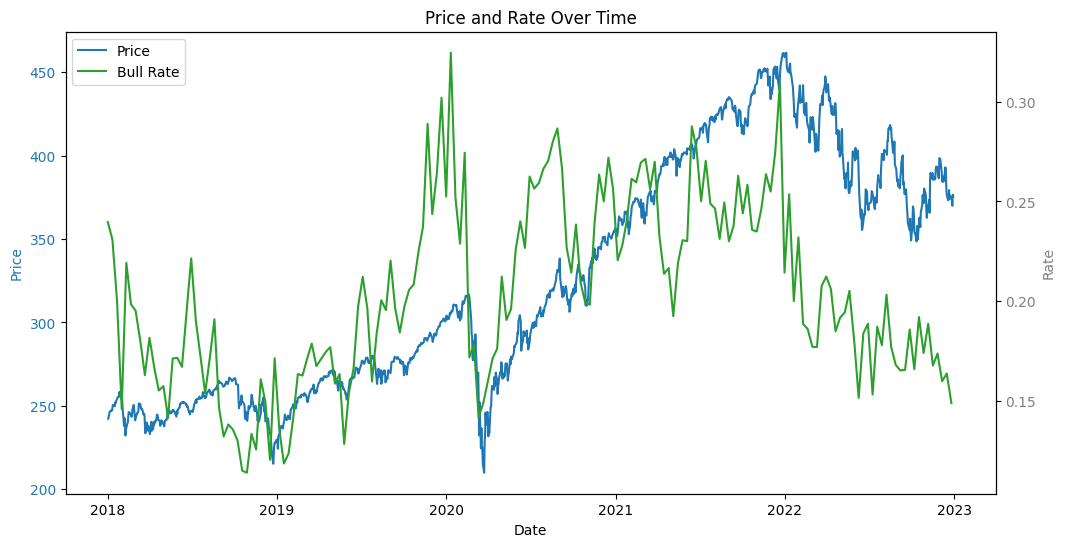

In [61]:
# Set date columns as index
one_price.set_index('date', inplace=True)
res_one.set_index('created_at', inplace=True)

# Resample to daily frequency to ensure common frequency
one_price = one_price.resample('D').interpolate()
res_one = res_one.resample('D').interpolate()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot price on primary y-axis
ax1.plot(one_price.index, one_price['price'], color='tab:blue', label='Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(res_one.index, res_one['bull_rate'], color='tab:green', label='Bull Rate')
#ax2.plot(res_one.index, res_one['bear_rate'], color='tab:red', label='Bear Rate')
ax2.set_ylabel('Rate', color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Add legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('Price and Rate Over Time')
plt.show()

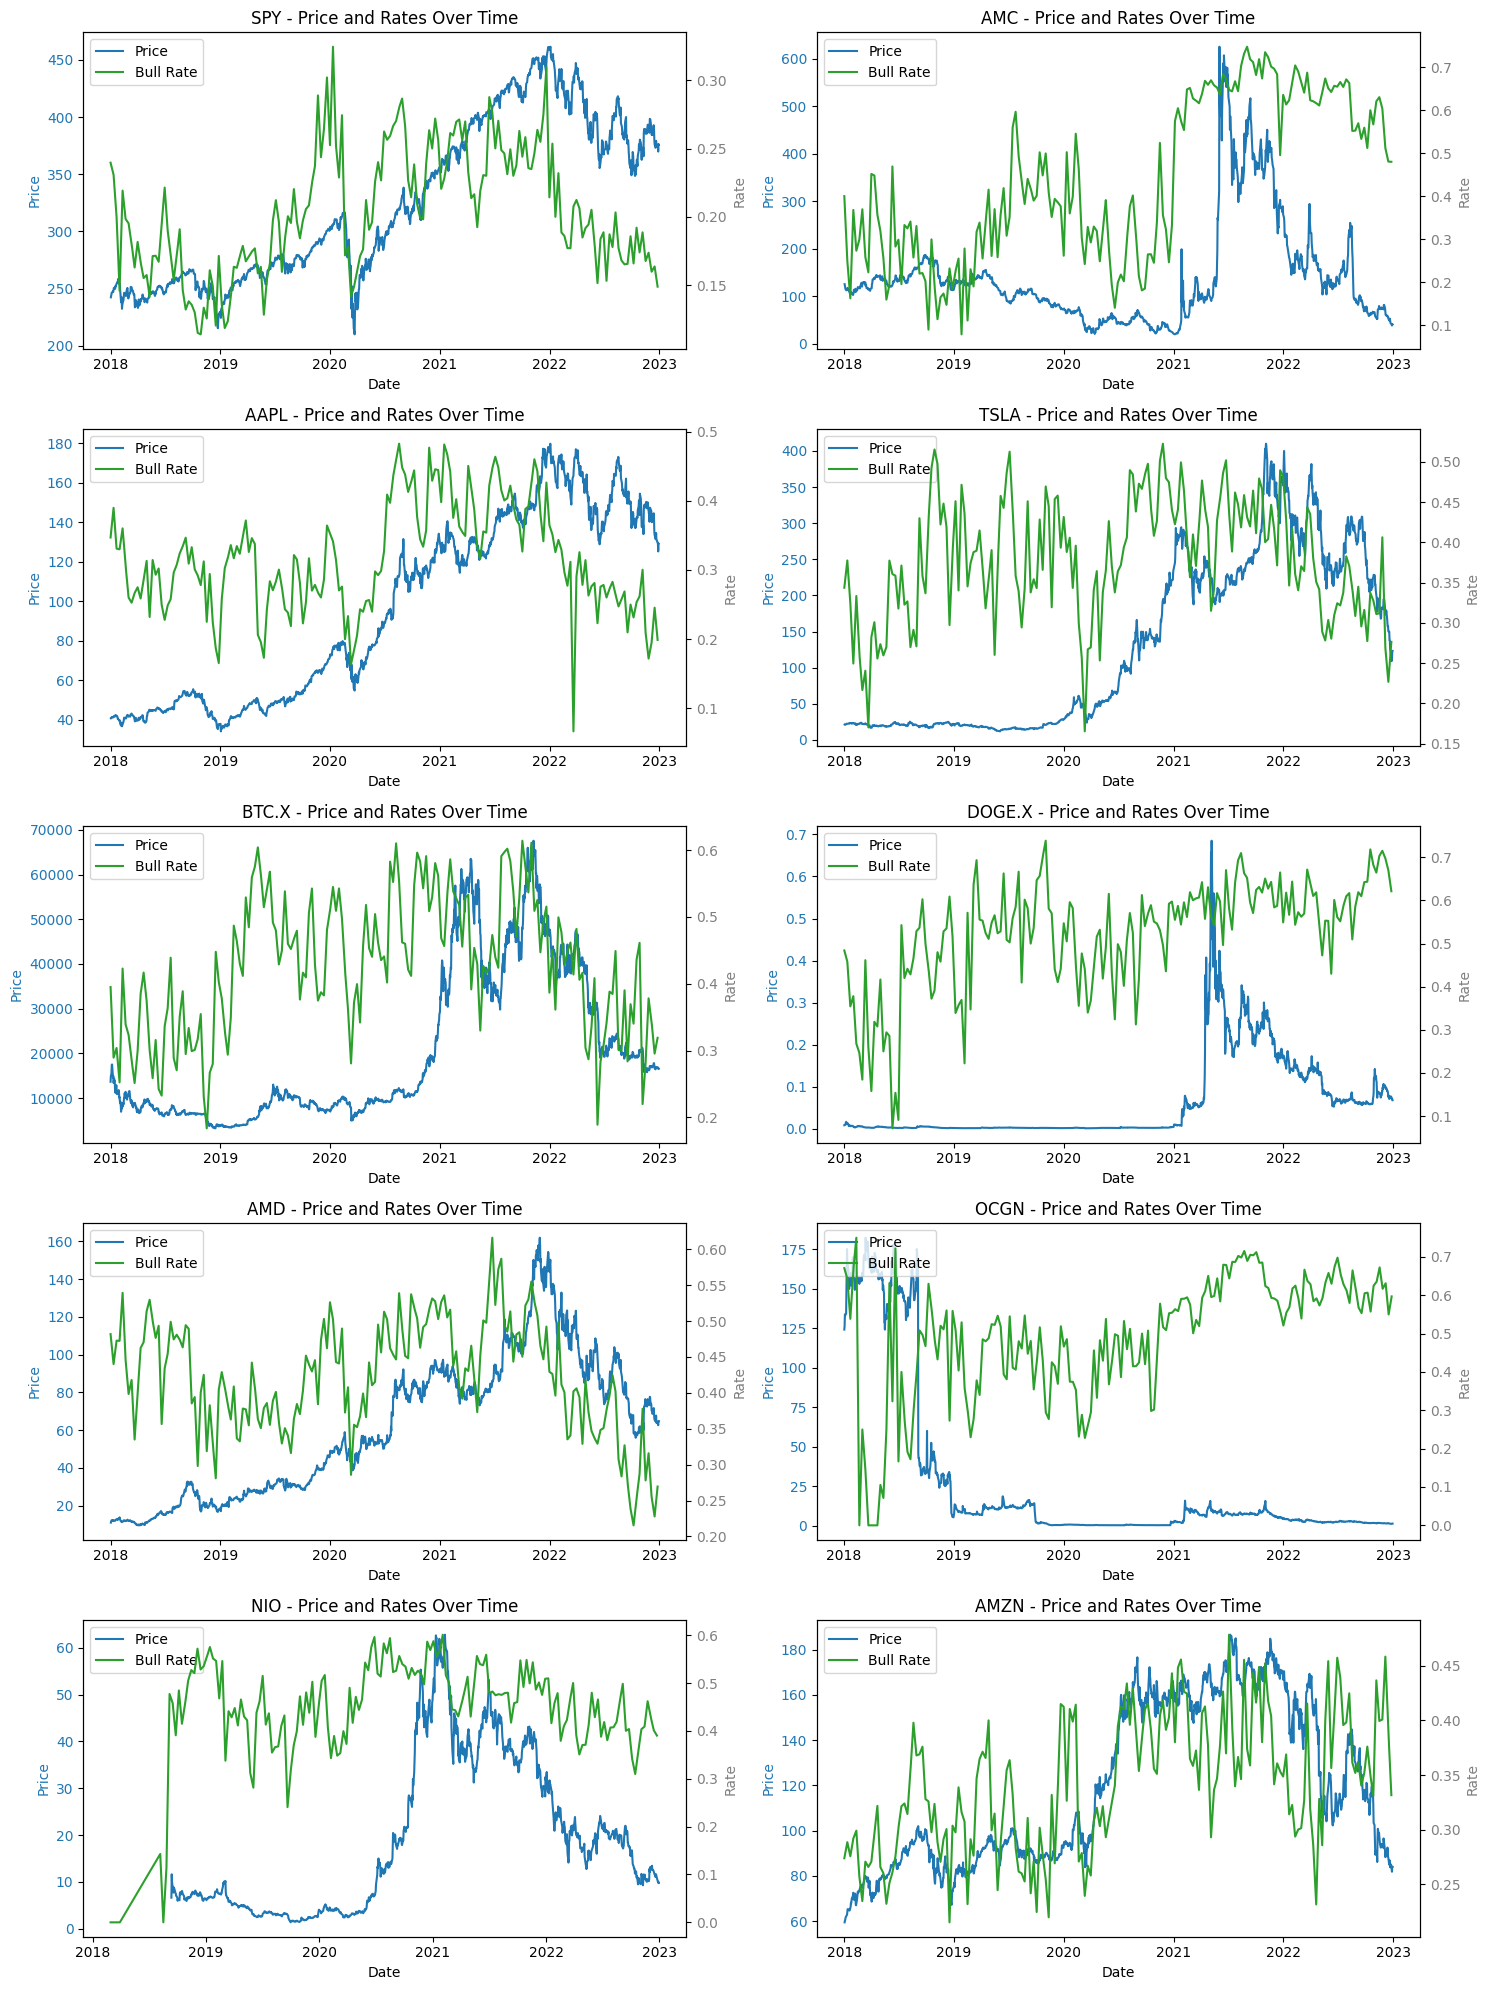

In [73]:
# Create a 5x2 subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Loop through each ticker and corresponding subplot
for i, ticker in enumerate(t20[:10]):
    ax1 = axes[i]
    
    # Filter the data for the current ticker
    one_price = t20_price[t20_price['ticker'] == ticker].copy()
    res_one = resampled_df[resampled_df['symbol'] == ticker].copy()

    # Convert date columns to datetime
    one_price['date'] = pd.to_datetime(one_price['date'])
    res_one['created_at'] = pd.to_datetime(res_one['created_at'])

    # Set date columns as index
    one_price.set_index('date', inplace=True)
    res_one.set_index('created_at', inplace=True)

    # Resample to daily frequency to ensure common frequency
    one_price = one_price.resample('D').interpolate()
    res_one = res_one.resample('D').interpolate()

    # Plot price on primary y-axis
    ax1.plot(one_price.index, one_price['price'], color='tab:blue', label='Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(res_one.index, res_one['bull_rate'], color='tab:green', label='Bull Rate')
    # ax2.plot(res_one.index, res_one['bearish_count'], color='tab:purple', label='Bear Rate')
    ax2.set_ylabel('Rate', color='tab:gray')
    ax2.tick_params(axis='y', labelcolor='tab:gray')

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    ax1.set_title(f'{ticker} - Price and Rates Over Time')

plt.tight_layout()
plt.show()

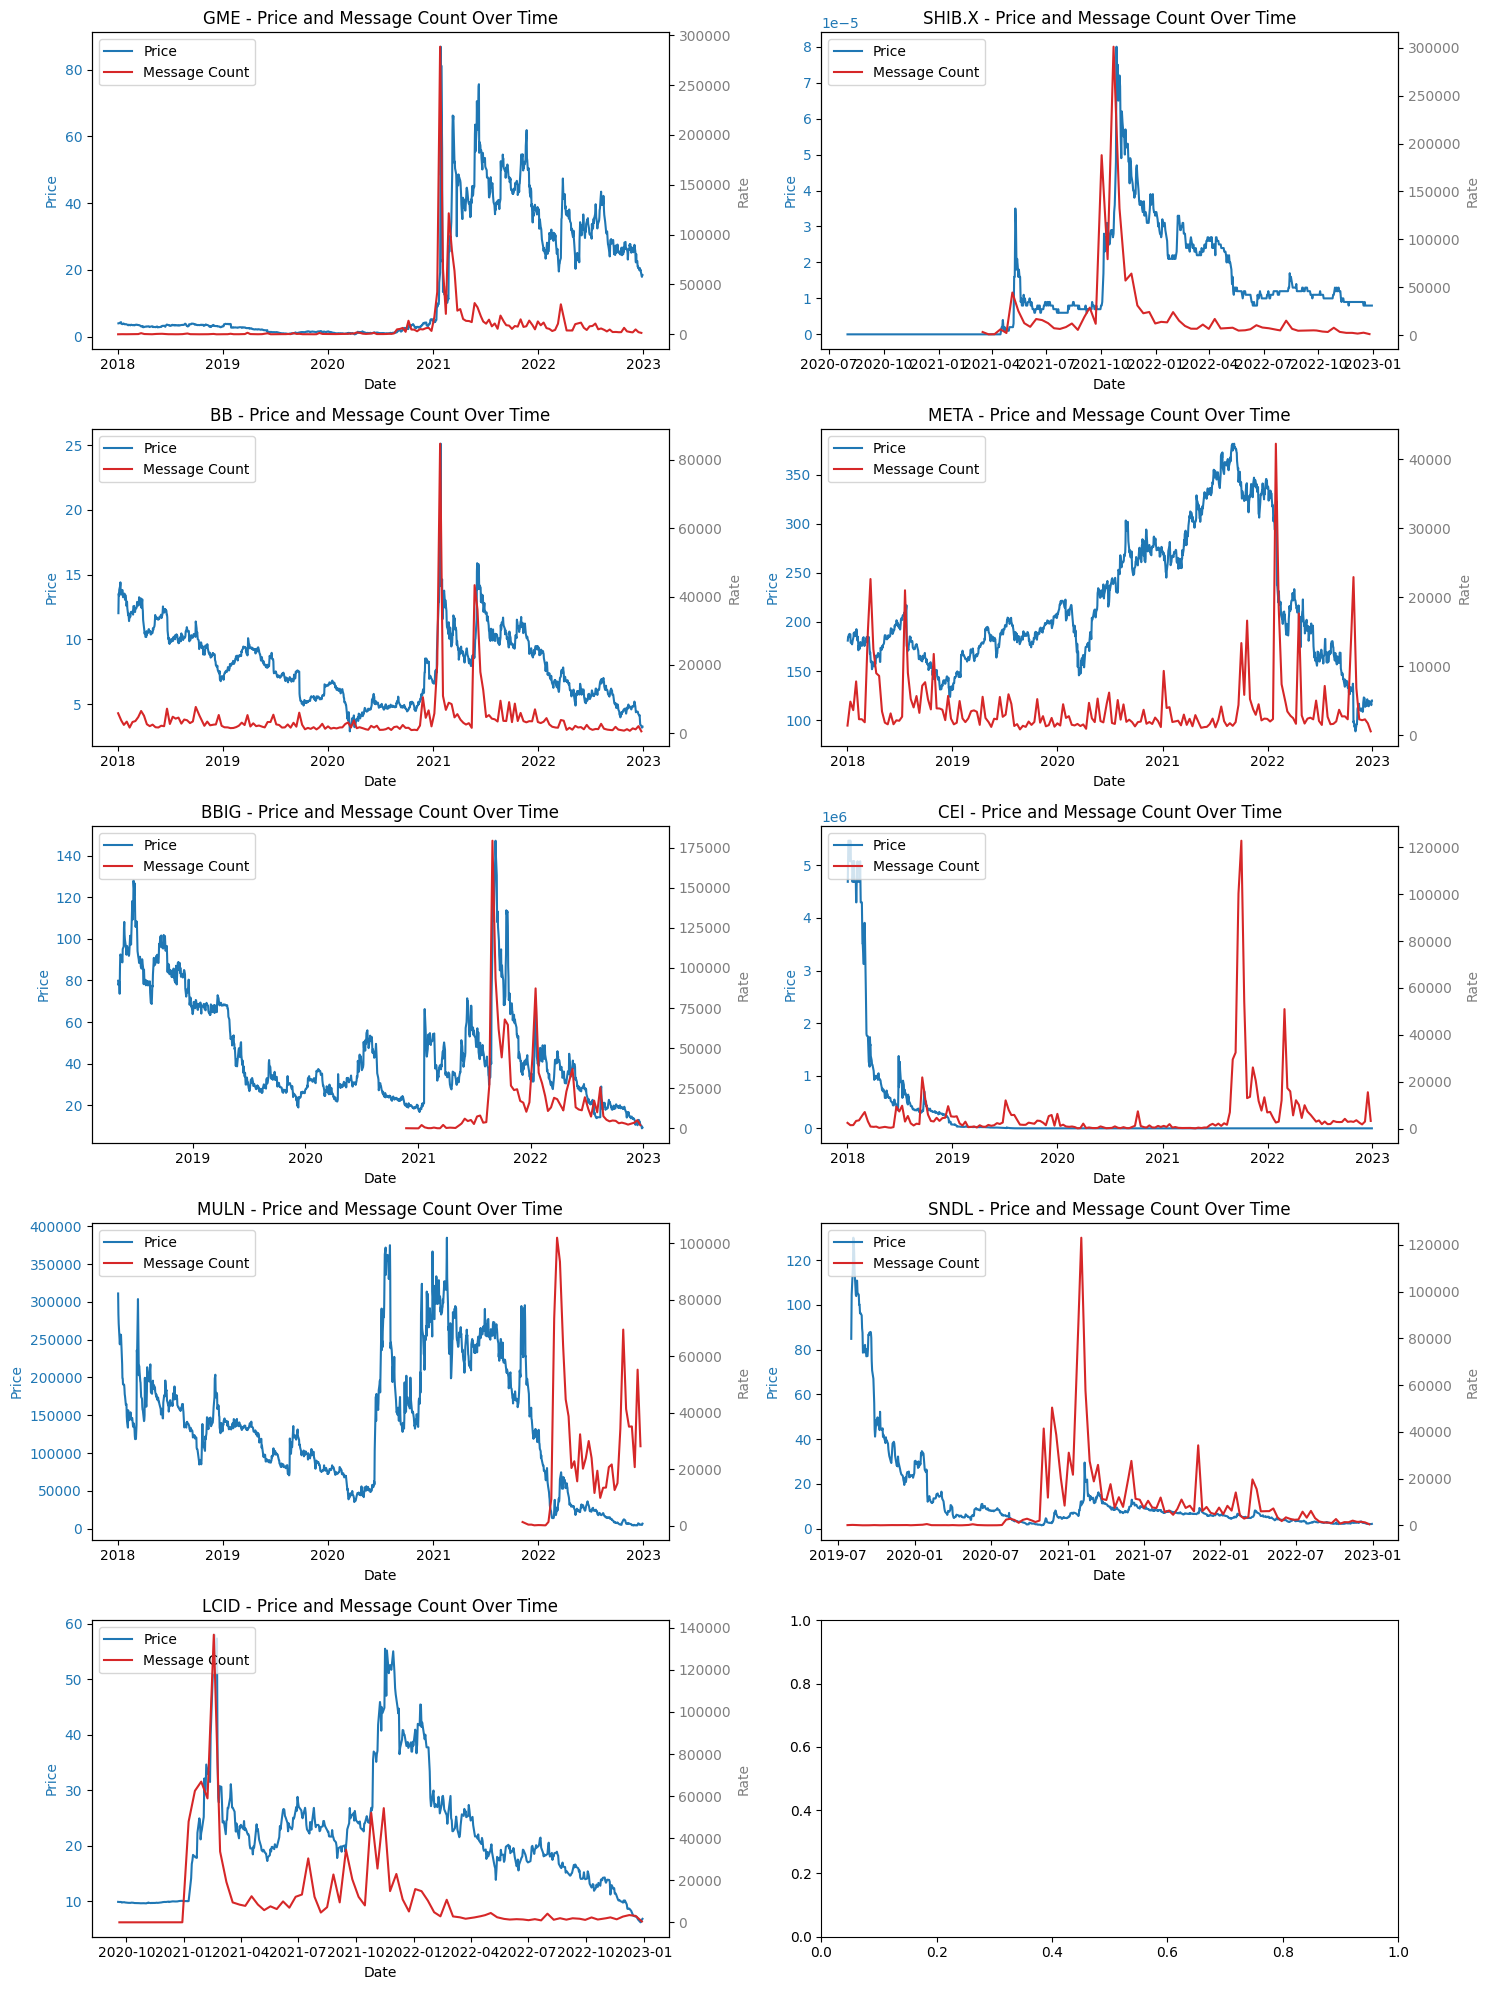

In [68]:
# Create a 5x2 subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Loop through each ticker and corresponding subplot
for i, ticker in enumerate(t20[10:19]):
    ax1 = axes[i]
    
    # Filter the data for the current ticker
    one_price = t20_price[t20_price['ticker'] == ticker].copy()
    res_one = resampled_df[resampled_df['symbol'] == ticker].copy()

    # Convert date columns to datetime
    one_price['date'] = pd.to_datetime(one_price['date'])
    res_one['created_at'] = pd.to_datetime(res_one['created_at'])

    # Set date columns as index
    one_price.set_index('date', inplace=True)
    res_one.set_index('created_at', inplace=True)

    # Resample to daily frequency to ensure common frequency
    one_price = one_price.resample('D').interpolate()
    res_one = res_one.resample('D').interpolate()

    # Plot price on primary y-axis
    ax1.plot(one_price.index, one_price['price'], color='tab:blue', label='Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(res_one.index, res_one['message_count'], color='tab:red', label='Message Count')
    #ax2.plot(res_one.index, res_one['bear_rate'], color='tab:red', linestyle=':', label='Bear Rate')
    ax2.set_ylabel('Rate', color='tab:gray')
    ax2.tick_params(axis='y', labelcolor='tab:gray')

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    ax1.set_title(f'{ticker} - Price and Message Count Over Time')

plt.tight_layout()
plt.show()

In [12]:
check_one = grouped.loc[grouped['symbol'] == 'SPY']

In [13]:
check_one['bull_rate'] = check_one['bullish_count']/check_one['message_count']
check_one['bear_rate'] = check_one['bearish_count']/check_one['message_count']
check_one['sent_rate'] = check_one['sent_count']/check_one['message_count']
check_one['no_sent_rate'] = check_one['no_sent_count']/check_one['message_count']

C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\2609979778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_one['bull_rate'] = check_one['bullish_count']/check_one['message_count']
C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\2609979778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_one['bear_rate'] = check_one['bearish_count']/check_one['message_count']
C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\2609979778.py:3: SettingWithCopyWarning: 
A value is trying to be 

In [14]:
check_one.head()

,Unnamed: 0,created_at,symbol,message_count,bullish_count,bearish_count,sent_count,no_sent_count,bull_rate,bear_rate,sent_rate,no_sent_rate
5191581,5191581,2018-01-01,SPY,167,39,11,50,117,0.233533,0.065868,0.299401,0.700599
5195255,5195255,2018-01-02,SPY,657,158,65,223,434,0.240487,0.098935,0.339422,0.660578
5199930,5199930,2018-01-03,SPY,833,189,70,259,574,0.226891,0.084034,0.310924,0.689076
5204796,5204796,2018-01-04,SPY,889,224,79,303,586,0.251969,0.088864,0.340832,0.659168
5209024,5209024,2018-01-05,SPY,1244,399,77,476,768,0.320740,0.061897,0.382637,0.617363


In [15]:
# Convert 'created_at' to datetime
check_one['created_at'] = pd.to_datetime(check_one['created_at'])

# Create a 10-day interval
check_one.set_index('created_at', inplace=True)
check_one_10d = check_one.resample('10D').mean().reset_index()

C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\4228979012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_one['created_at'] = pd.to_datetime(check_one['created_at'])
C:\Users\xl2860\AppData\Local\Temp\25\ipykernel_12000\4228979012.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  check_one_10d = check_one.resample('10D').mean().reset_index()


In [16]:
check_one_10d.head()

,created_at,Unnamed: 0,message_count,bullish_count,bearish_count,sent_count,no_sent_count,bull_rate,bear_rate,sent_rate,no_sent_rate
0,2018-01-01,5210027.4,728.5,174.6,60.8,235.4,493.1,0.247411,0.077135,0.324546,0.675454
1,2018-01-11,5249253.8,923.9,213.3,97.0,310.3,613.6,0.216943,0.094923,0.311867,0.688133
2,2018-01-21,5289078.7,1297.4,259.4,133.4,392.8,904.6,0.206358,0.094412,0.300770,0.699230
3,2018-01-31,5330647.8,2919.7,426.4,520.7,947.1,1972.6,0.145182,0.172183,0.317365,0.682635
4,2018-02-10,5372144.9,1611.9,353.4,278.4,631.8,980.1,0.211276,0.147851,0.359126,0.640874


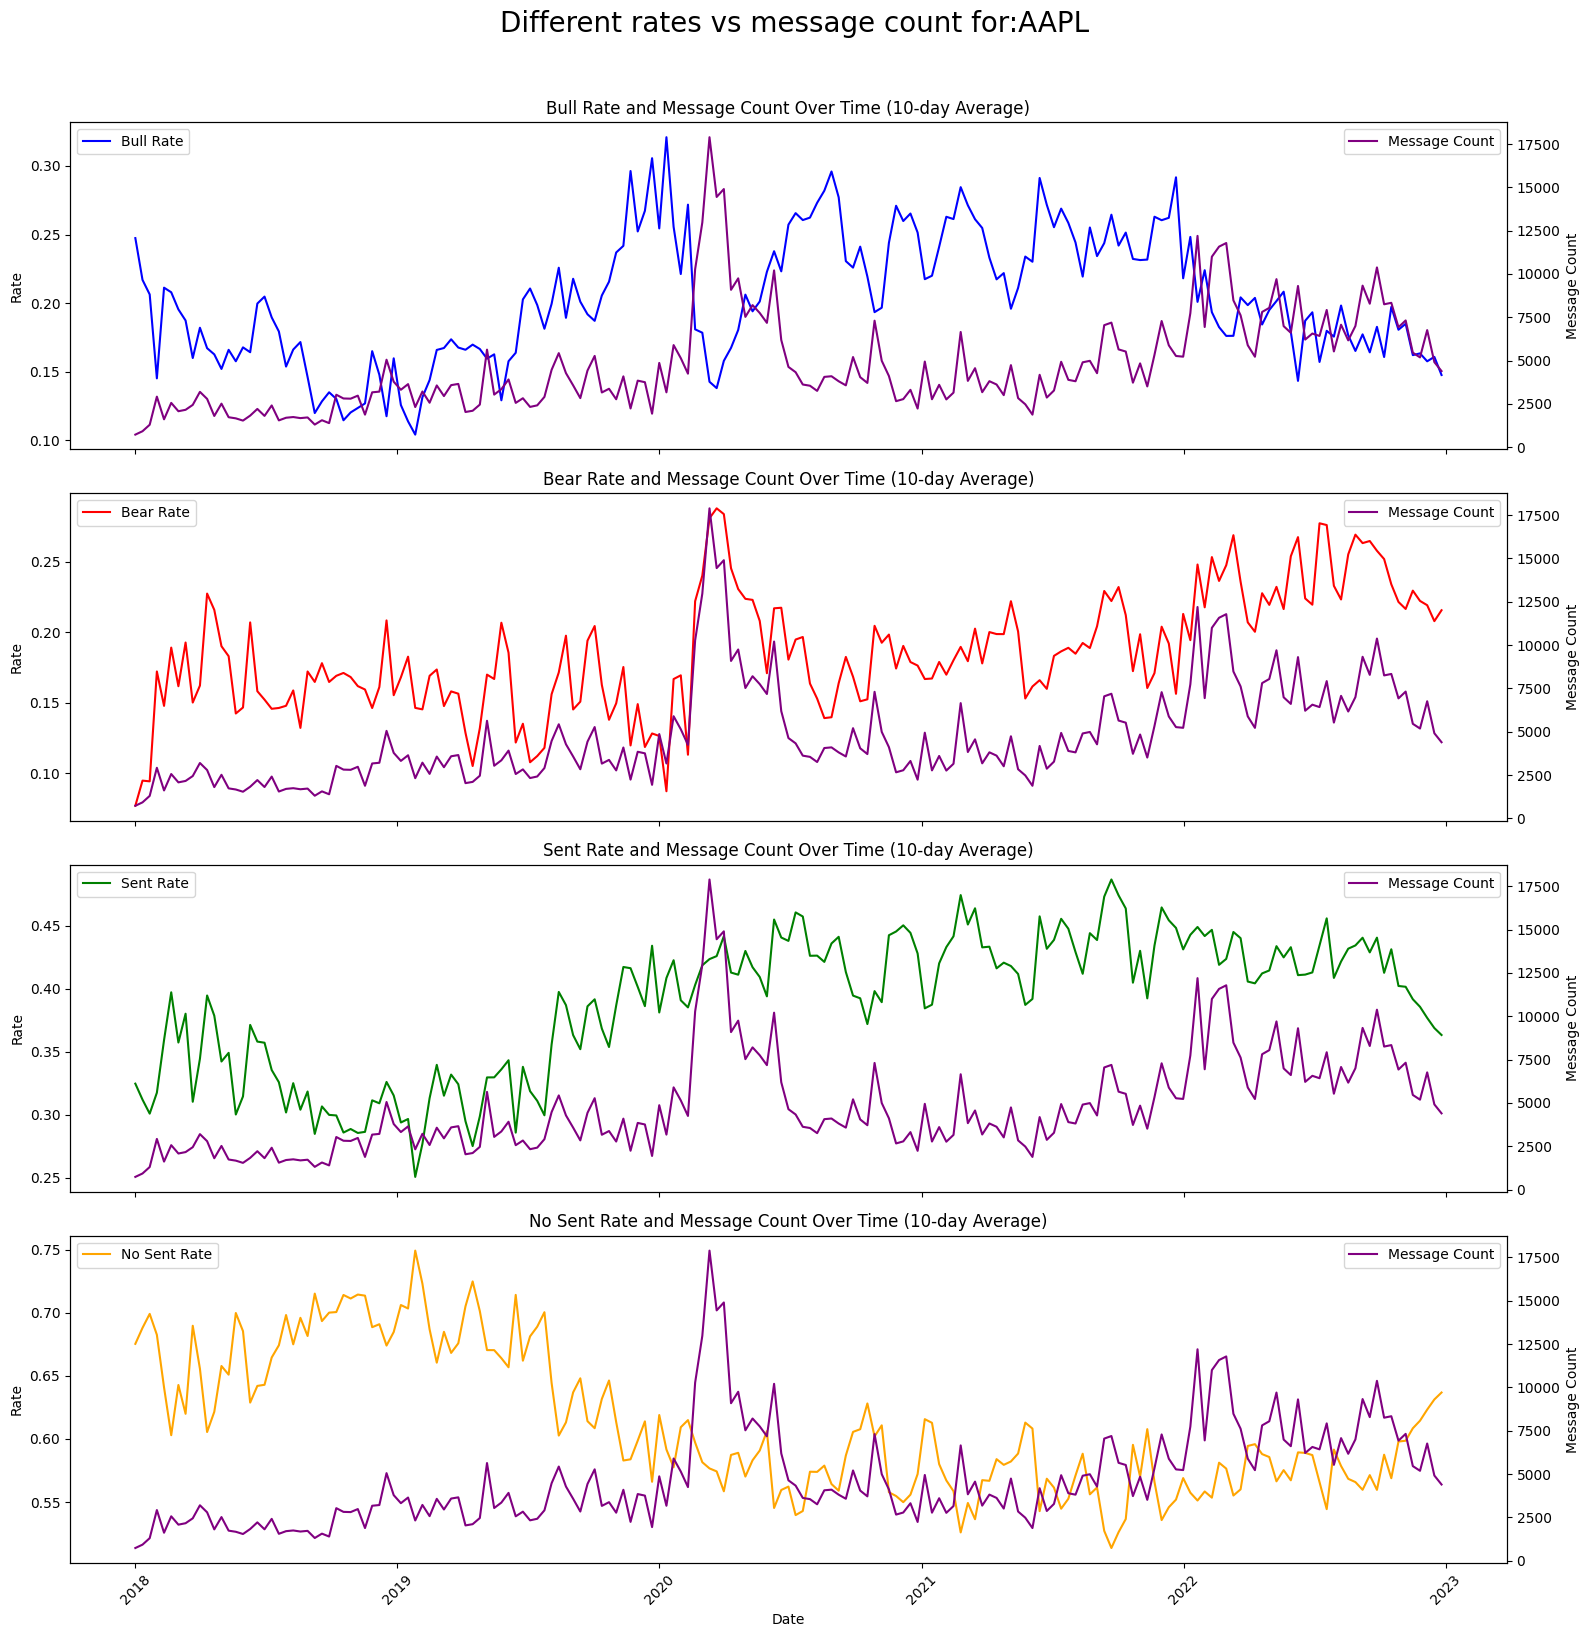

In [17]:
# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(16, 16), sharex=True)

# Plotting each rate with message_count
rates = ['bull_rate', 'bear_rate', 'sent_rate', 'no_sent_rate']
colors = ['blue', 'red', 'green', 'orange']
titles = ['Bull Rate', 'Bear Rate', 'Sent Rate', 'No Sent Rate']

for i, rate in enumerate(rates):
    ax1 = axs[i]
    ax2 = ax1.twinx()
    
    # Plotting rate
    ax1.plot(check_one_10d['created_at'], check_one_10d[rate], label=titles[i], color=colors[i])
    ax1.set_ylabel('Rate')
    ax1.set_title(f'{titles[i]} and Message Count Over Time (10-day Average)')
    ax1.legend(loc='upper left')

    # Plotting message_count
    ax2.plot(check_one_10d['created_at'], check_one_10d['message_count'], label='Message Count', color='purple')
    ax2.set_ylabel('Message Count')
    ax2.legend(loc='upper right')

# Set common x-axis label
axs[-1].set_xlabel('Date')

# Rotate x-axis labels for better visibility
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45)
fig.suptitle('Different rates vs message count for:AAPL', fontsize=20, y=1.02)
# Adjust layout and display plot
fig.tight_layout()
plt.show()

In [37]:
grouped.head()

,created_at,symbol,message_count,bullish_count,bearish_count,sent_count,no_sent_count
0,2018-01-01,6E_F,1,0,0,0,1
1,2018-01-01,6J_F,1,0,0,0,1
2,2018-01-01,A,2,0,0,0,2
3,2018-01-01,AABA,1,0,0,0,1
4,2018-01-01,AAL,4,0,0,0,4


In [7]:
check_all = grouped.drop(columns = 'symbol')
check_all = check_all.groupby('created_at').sum()#.reset_index()
check_all.head()

,message_count,bullish_count,bearish_count,sent_count,no_sent_count
created_at,,,,,
2008-05-27,5,0,0,0,5
2008-05-28,11,0,0,0,11
2008-05-29,25,0,0,0,25
2008-05-30,26,0,0,0,26
2008-05-31,3,0,0,0,3


In [8]:
# Create a 10-day interva
check_all_10d = check_all.resample('10D').mean().reset_index()

In [9]:
check_all_10d['sent_rate'] = check_all_10d['sent_count']/check_all_10d['message_count']

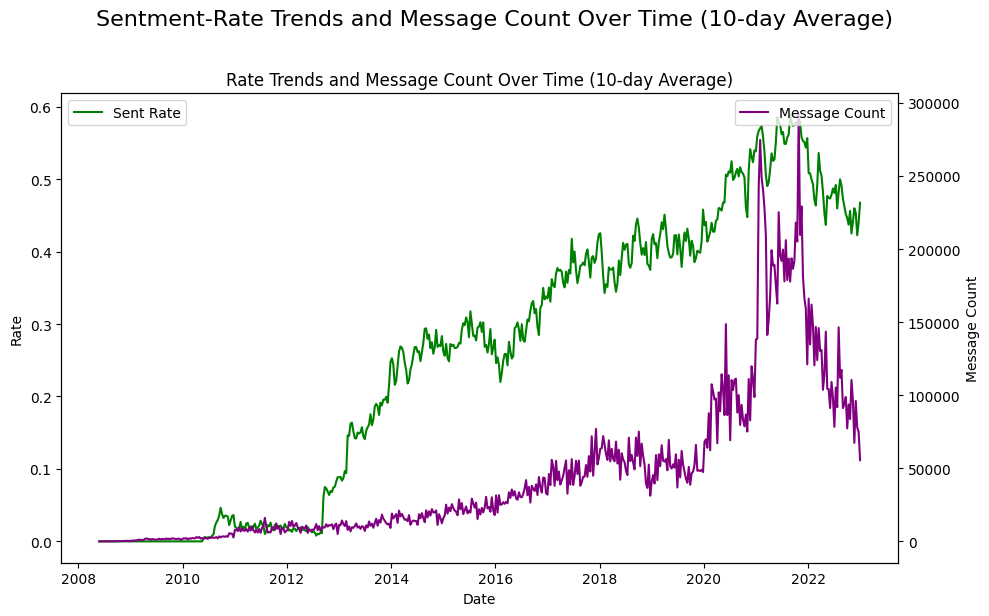

In [10]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting rates on primary y-axis
# ax1.plot(check_all_10d['created_at'], check_all_10d['bull_rate'], label='Bull Rate', marker='o', color='blue')
# ax1.plot(check_all_10d['created_at'], check_all_10d['bear_rate'], label='Bear Rate', marker='o', color='red')
ax1.plot(check_all_10d['created_at'], check_all_10d['sent_rate'], label='Sent Rate', marker='', color='green')
# ax1.plot(check_all_10d['created_at'], check_all_10d['no_sent_rate'], label='No Sent Rate', marker='o', color='orange')

# Adding labels and title for primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Rate')
ax1.set_title('Rate Trends and Message Count Over Time (10-day Average)')
ax1.legend(loc='upper left')

# Creating a secondary y-axis for message_count
ax2 = ax1.twinx()
ax2.plot(check_all_10d['created_at'], check_all_10d['message_count'], label='Message Count', marker='', color='purple')
ax2.set_ylabel('Message Count')
ax2.legend(loc='upper right')

# Add a big title to the figure
fig.suptitle('Sentment-Rate Trends and Message Count Over Time (10-day Average)', fontsize=16, y=1.02)

# Adjust layout and display plot
fig.tight_layout()
plt.show()

### Price sentiment message_count correlation (pearson)

In [2]:
sym_rank = pd.read_csv('E:\\analysis_data\\symbol_ranks.csv')
sym_rank.head()

,Unnamed: 0,rank_by_mes_count,symbol,rank_by_month,rank_diff
0,0,0,SPY,0,0
1,1,1,AMC,23,-22
2,2,2,AAPL,1,1
3,3,3,TSLA,2,1
4,4,4,BTC.X,10,-6


In [3]:
t30 = sym_rank.head(30)['symbol']
import yfinance as yf

# Define your list of tickers
tickers = t30
# Replace ".X" with "-USD" in tickers
tickers_yfinance = [ticker.replace(".X", "-USD") for ticker in tickers]

# Initialize an empty list to store DataFrames for each ticker
dfs = []

# Fetch data for each ticker
for ticker, yf_ticker in zip(tickers, tickers_yfinance):
    try:
        df = yf.download(yf_ticker, start="2018-01-01", end="2022-12-31")
        df = df.reset_index()
        df['ticker'] = ticker
        df = df[['ticker', 'Date', 'Adj Close']]
        df.columns = ['ticker', 'date', 'price']
        dfs.append(df)
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")

# Concatenate the DataFrames into a single DataFrame
price_df = pd.concat(dfs, ignore_index=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
price_df.head()

,ticker,date,price
0,SPY,2018-01-02,267.905701
1,SPY,2018-01-03,269.600250
2,SPY,2018-01-04,270.736572
3,SPY,2018-01-05,272.540771
4,SPY,2018-01-08,273.039154


In [44]:
t30 = list(sym_rank.head(30)['symbol'])
t30.remove('ES_F')
t30.remove('SHIB.X')
t30.remove('OCGN')
print(t30)

['SPY', 'AMC', 'AAPL', 'TSLA', 'BTC.X', 'DOGE.X', 'AMD', 'NIO', 'AMZN', 'GME', 'BB', 'META', 'BBIG', 'CEI', 'MULN', 'SNDL', 'LCID', 'NFLX', 'IBIO', 'BABA', 'XWEL', 'XELA', 'WKHS', 'CENN', 'NVDA', 'MMAT', 'INO']


In [6]:
grouped = pd.read_csv('E:\\analysis_data\\sentiment_count.csv')
grouped = grouped.loc[(grouped['created_at']>='2018-01-01')&(grouped['symbol'].isin(t30))]

In [7]:
grouped.head()

,Unnamed: 0,created_at,symbol,message_count,bullish_count,bearish_count,sent_count,no_sent_count
5189326,5189326,2018-01-01,AAPL,125,36,9,45,80
5189440,5189440,2018-01-01,AMC,52,19,6,25,27
5189444,5189444,2018-01-01,AMD,126,44,1,45,81
5189465,5189465,2018-01-01,AMZN,47,12,1,13,34
5189592,5189592,2018-01-01,BABA,39,11,1,12,27


In [10]:
price_df.head()

,ticker,date,price
0,SPY,2018-01-02,267.905701
1,SPY,2018-01-03,269.600250
2,SPY,2018-01-04,270.736572
3,SPY,2018-01-05,272.540771
4,SPY,2018-01-08,273.039154


In [8]:
from scipy.stats import pearsonr

In [45]:
coo = []
for t in t30:
    print(t)
    price_one = price_df.loc[price_df['ticker']==t]
    message_df = grouped.loc[grouped['symbol']==t]

    # Convert date columns to datetime
    price_one['date'] = pd.to_datetime(price_one['date'])
    message_df['created_at'] = pd.to_datetime(message_df['created_at'])

    # Resample price data to weekly frequency, taking the last price of each week
    price_one.set_index('date', inplace=True)
    weekly_price_df = price_one['price'].resample('W-SUN').last().dropna()

    # Calculate weekly price change
    weekly_price_change = weekly_price_df.pct_change().dropna()

    # Resample message count data to weekly frequency, summing the counts for each week
    message_df.set_index('created_at', inplace=True)
    weekly_message_df = message_df.resample('W-SUN').sum().dropna()

    # Calculate weekly bullish rate
    weekly_message_df['bullish_rate'] = weekly_message_df['bullish_count'] / weekly_message_df['message_count']

    # Merge the weekly price changes with the weekly bullish rates
    merged_df = pd.merge(weekly_price_change, weekly_message_df[['bullish_rate','message_count']], left_index=True, right_index=True, how='inner').fillna(0)

    # Compute Pearson correlation
    correlation1, p_value1 = pearsonr(merged_df['price'], merged_df['bullish_rate'])

    # Compute Pearson correlation
    correlation, p_value = pearsonr(merged_df['price'], merged_df['message_count'])
    coo.append({'symbol':t,'price_bullrate_corr':correlation1,'price_bullrate_pvalue':p_value1,
                'price_mescount_corr':correlation,'price_mescount_pvalue':p_value})
    #print(t)
coo = pd.DataFrame(coo)

SPY
AMC
AAPL
TSLA
BTC.X
DOGE.X
AMD


C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_one['date'] = pd.to_datetime(price_one['date'])
C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  message_df['created_at'] = pd.to_datetime(message_df['created_at'])
C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated.

NIO
AMZN
GME
BB
META
BBIG
CEI
MULN


C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_message_df = message_df.resample('W-SUN').sum().dropna()
C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_one['date'] = pd.to_datetime(price_one['date'])
C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

SNDL
LCID
NFLX
IBIO
BABA
XWEL
XELA
WKHS
CENN
NVDA
MMAT
INO


C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_message_df = message_df.resample('W-SUN').sum().dropna()
C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_one['date'] = pd.to_datetime(price_one['date'])
C:\Users\xl2860\AppData\Local\Temp\27\ipykernel_6604\4073320071.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [48]:
coo#.sort_values(by='price_bullrate_corr', ascending=False)

,symbol,price_bullrate_corr,price_bullrate_pvalue,price_mescount_corr,price_mescount_pvalue
0,SPY,0.241788,8.198709e-05,-0.171094,5.675869e-03
1,AMC,0.149629,1.574903e-02,0.420737,1.410845e-12
2,AAPL,0.250186,4.508112e-05,-0.017337,7.808452e-01
3,TSLA,0.466930,1.748493e-15,0.027478,6.592043e-01
4,BTC.X,0.565002,2.497109e-23,-0.169013,6.298942e-03
5,DOGE.X,0.117693,5.806782e-02,0.556496,1.525716e-22
6,AMD,0.388638,8.389092e-11,0.177227,4.148260e-03
7,NIO,0.514002,1.669384e-16,0.172740,9.587001e-03
8,AMZN,0.208267,7.270866e-04,-0.076612,2.182521e-01
9,GME,0.139485,2.449335e-02,0.684549,2.735334e-37


## User-predict accuracy

In [49]:
use = pd.read_csv('E:\\analysis_data\\have_symbol_sentiment_big.csv')
use = use.loc[(use['created_at']<='2022-12-31')&(use['created_at']>='2018-01-01')]

In [63]:
use.head()
# Replace single quotes with double quotes
use['symbol_list'] = use['symbol_list'].str.replace("'", '"')

# Apply json.loads to convert JSON-like strings to lists
use['symbol_list'] = use['symbol_list'].apply(lambda x: json.loads(x) if x else [])

use['sym_number'] = [len(i) for i in use['symbol_list']]

In [54]:
tickers = list(sym_rank.head(100)['symbol'])
# Replace ".X" with "-USD" in tickers
tickers_yfinance = [ticker.replace(".X", "-USD") for ticker in tickers]

# Initialize an empty list to store DataFrames for each ticker
dfs = []

# Fetch data for each ticker
fail = 0
check = 0
for ticker, yf_ticker in zip(tickers, tickers_yfinance):
    try:
        check+=1
        print(check)
        df = yf.download(yf_ticker, start="2018-01-01", end="2022-12-31")
        df = df.reset_index()
        df['ticker'] = ticker
        df = df[['ticker', 'Date', 'Adj Close']]
        df.columns = ['ticker', 'date', 'price']
        dfs.append(df)
    except Exception as e:
        fail+=1
        print(f"Failed to fetch data for {ticker}: {e}, number{fail}")

# Concatenate the DataFrames into a single DataFrame
price_df = pd.concat(dfs, ignore_index=True)

1
[*********************100%***********************]  1 of 1 completed
2
[*********************100%***********************]  1 of 1 completed
3
[*********************100%***********************]  1 of 1 completed
4
[*********************100%***********************]  1 of 1 completed
5
[*********************100%***********************]  1 of 1 completed
6
[*********************100%***********************]  1 of 1 completed
7
[*********************100%***********************]  1 of 1 completed
8
[*********************100%***********************]  1 of 1 completed
9
[*********************100%***********************]  1 of 1 completed
10
[*********************100%***********************]  1 of 1 completed
11
[*********************100%***********************]  1 of 1 completed
12
[*********************100%***********************]  1 of 1 completed
13
[*********************100%***********************]  1 of 1 completed
14
[*********************100%***********************]  1 of 1 completed
1

In [65]:
use['created_at'] = pd.to_datetime(use['created_at'])
use = use.rename(columns = {'created_at':'date'})
use['ticker'] = [i[0] for i in use['symbol_list']]
use = use.drop(columns=['Unnamed: 0','symbol_list','sym_number'])
# Merge DataFrames (left merge)
merged_df = pd.merge(use, price_df, on=['date', 'ticker'])

In [83]:
acc_lis = []

In [84]:
price_df_shifted = price_df.copy()
off = 1
price_df_shifted['date'] -= pd.DateOffset(days=off)
merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
# ck = merged_df_off[['date','ticker','price','price_future']].drop_duplicates()
# ck.loc[ck['ticker']=="AAPL"].head(10)
df = merged_df_off
df['correctness'] = 0
bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
df.loc[bullish_condition | bearish_condition, 'correctness'] = 1
# Calculate the total number of posts for each user
user_post_counts = df['user_id'].value_counts()

# Filter out users with fewer than 50 posts
users_to_keep = user_post_counts[user_post_counts >= 50].index
filtered_df = df[df['user_id'].isin(users_to_keep)]
accuracy_by_user = filtered_df.groupby(by = ['user_id'])['correctness'].mean().reset_index()
# plt.figure(figsize=(8, 6))
# sns.histplot(data=accuracy_by_user, x='correctness', bins=10, kde=True)
# plt.title('Distribution of Predicting Accuracy by User, with ttl message > 50')
# plt.xlabel('Accuracy')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()
accuracy_by_user = accuracy_by_user.rename(columns = {'correctness':f'correctness_{off}'})
acc_lis.append(accuracy_by_user)

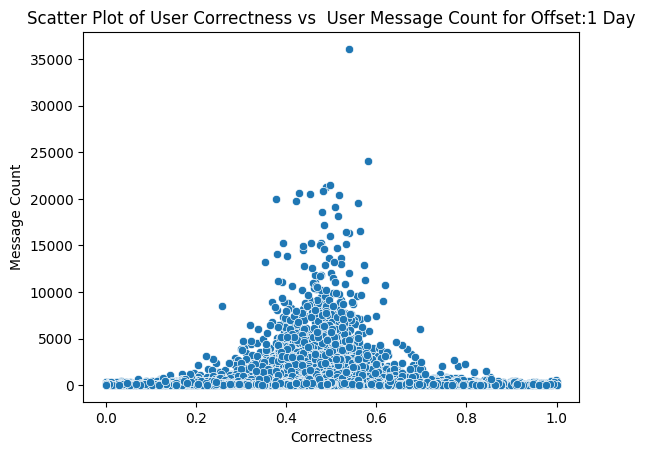

In [86]:
mes_count_by_use = merged_df[['user_id','message_id']].groupby('user_id').size().reset_index().rename(columns = {0:'count'})
check_user = accuracy_by_user.merge(mes_count_by_use, on = 'user_id')
accuracy_by_user.shape, mes_count_by_use.shape, check_user.shape
# Creating the scatter plot
sns.scatterplot(data=check_user, x=f'correctness_{off}', y='count')

# Adding labels and title
plt.xlabel('Correctness')
plt.ylabel('Message Count')
plt.title('Scatter Plot of User Correctness vs  User Message Count for Offset:1 Day')

# Showing the plot
plt.show()

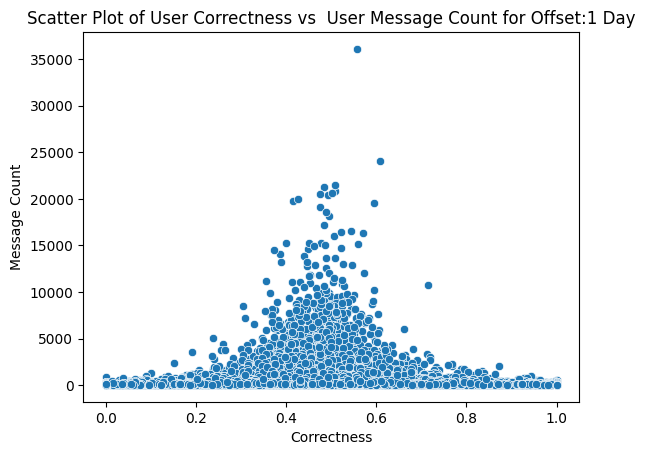

In [87]:
price_df_shifted = price_df.copy()
off = 3
price_df_shifted['date'] -= pd.DateOffset(days=off)
merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
# ck = merged_df_off[['date','ticker','price','price_future']].drop_duplicates()
# ck.loc[ck['ticker']=="AAPL"].head(10)
df = merged_df_off
df['correctness'] = 0
bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
df.loc[bullish_condition | bearish_condition, 'correctness'] = 1
# Calculate the total number of posts for each user
user_post_counts = df['user_id'].value_counts()

# Filter out users with fewer than 50 posts
users_to_keep = user_post_counts[user_post_counts >= 50].index
filtered_df = df[df['user_id'].isin(users_to_keep)]
accuracy_by_user = filtered_df.groupby(by = ['user_id'])['correctness'].mean().reset_index()
# plt.figure(figsize=(8, 6))
# sns.histplot(data=accuracy_by_user, x='correctness', bins=10, kde=True)
# plt.title('Distribution of Predicting Accuracy by User, with ttl message > 50')
# plt.xlabel('Accuracy')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()
accuracy_by_user = accuracy_by_user.rename(columns = {'correctness':f'correctness_{off}'})
acc_lis.append(accuracy_by_user)


mes_count_by_use = merged_df[['user_id','message_id']].groupby('user_id').size().reset_index().rename(columns = {0:'count'})
check_user = accuracy_by_user.merge(mes_count_by_use, on = 'user_id')
accuracy_by_user.shape, mes_count_by_use.shape, check_user.shape
# Creating the scatter plot
sns.scatterplot(data=check_user, x=f'correctness_{off}', y='count')

# Adding labels and title
plt.xlabel('Correctness')
plt.ylabel('Message Count')
plt.title('Scatter Plot of User Correctness vs  User Message Count for Offset:1 Day')

# Showing the plot
plt.show()

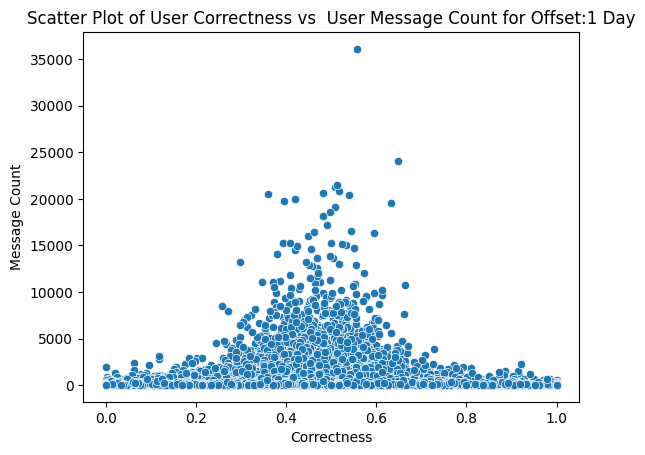

In [88]:
price_df_shifted = price_df.copy()
off = 7
price_df_shifted['date'] -= pd.DateOffset(days=off)
merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
# ck = merged_df_off[['date','ticker','price','price_future']].drop_duplicates()
# ck.loc[ck['ticker']=="AAPL"].head(10)
df = merged_df_off
df['correctness'] = 0
bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
df.loc[bullish_condition | bearish_condition, 'correctness'] = 1
# Calculate the total number of posts for each user
user_post_counts = df['user_id'].value_counts()

# Filter out users with fewer than 50 posts
users_to_keep = user_post_counts[user_post_counts >= 50].index
filtered_df = df[df['user_id'].isin(users_to_keep)]
accuracy_by_user = filtered_df.groupby(by = ['user_id'])['correctness'].mean().reset_index()
# plt.figure(figsize=(8, 6))
# sns.histplot(data=accuracy_by_user, x='correctness', bins=10, kde=True)
# plt.title('Distribution of Predicting Accuracy by User, with ttl message > 50')
# plt.xlabel('Accuracy')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()
accuracy_by_user = accuracy_by_user.rename(columns = {'correctness':f'correctness_{off}'})
acc_lis.append(accuracy_by_user)


mes_count_by_use = merged_df[['user_id','message_id']].groupby('user_id').size().reset_index().rename(columns = {0:'count'})
check_user = accuracy_by_user.merge(mes_count_by_use, on = 'user_id')
accuracy_by_user.shape, mes_count_by_use.shape, check_user.shape
# Creating the scatter plot
sns.scatterplot(data=check_user, x=f'correctness_{off}', y='count')

# Adding labels and title
plt.xlabel('Correctness')
plt.ylabel('Message Count')
plt.title('Scatter Plot of User Correctness vs  User Message Count for Offset:1 Day')

# Showing the plot
plt.show()

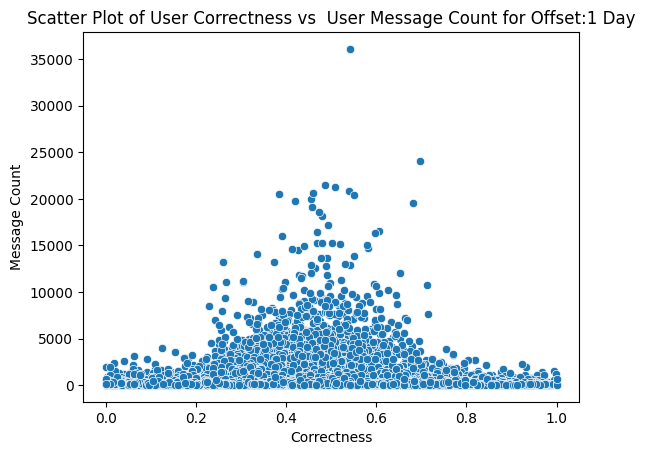

In [89]:
price_df_shifted = price_df.copy()
off = 14
price_df_shifted['date'] -= pd.DateOffset(days=off)
merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
# ck = merged_df_off[['date','ticker','price','price_future']].drop_duplicates()
# ck.loc[ck['ticker']=="AAPL"].head(10)
df = merged_df_off
df['correctness'] = 0
bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
df.loc[bullish_condition | bearish_condition, 'correctness'] = 1
# Calculate the total number of posts for each user
user_post_counts = df['user_id'].value_counts()

# Filter out users with fewer than 50 posts
users_to_keep = user_post_counts[user_post_counts >= 50].index
filtered_df = df[df['user_id'].isin(users_to_keep)]
accuracy_by_user = filtered_df.groupby(by = ['user_id'])['correctness'].mean().reset_index()
# plt.figure(figsize=(8, 6))
# sns.histplot(data=accuracy_by_user, x='correctness', bins=10, kde=True)
# plt.title('Distribution of Predicting Accuracy by User, with ttl message > 50')
# plt.xlabel('Accuracy')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()
accuracy_by_user = accuracy_by_user.rename(columns = {'correctness':f'correctness_{off}'})
acc_lis.append(accuracy_by_user)


mes_count_by_use = merged_df[['user_id','message_id']].groupby('user_id').size().reset_index().rename(columns = {0:'count'})
check_user = accuracy_by_user.merge(mes_count_by_use, on = 'user_id')
accuracy_by_user.shape, mes_count_by_use.shape, check_user.shape
# Creating the scatter plot
sns.scatterplot(data=check_user, x=f'correctness_{off}', y='count')

# Adding labels and title
plt.xlabel('Correctness')
plt.ylabel('Message Count')
plt.title('Scatter Plot of User Correctness vs  User Message Count for Offset:1 Day')

# Showing the plot
plt.show()

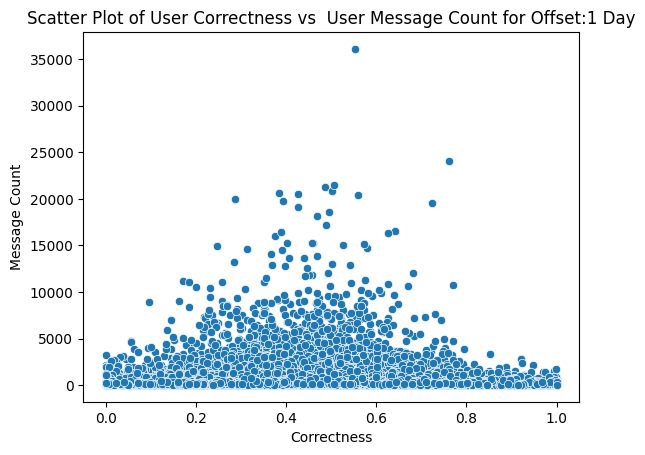

In [90]:
price_df_shifted = price_df.copy()
off = 30
price_df_shifted['date'] -= pd.DateOffset(days=off)
merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
# ck = merged_df_off[['date','ticker','price','price_future']].drop_duplicates()
# ck.loc[ck['ticker']=="AAPL"].head(10)
df = merged_df_off
df['correctness'] = 0
bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
df.loc[bullish_condition | bearish_condition, 'correctness'] = 1
# Calculate the total number of posts for each user
user_post_counts = df['user_id'].value_counts()

# Filter out users with fewer than 50 posts
users_to_keep = user_post_counts[user_post_counts >= 50].index
filtered_df = df[df['user_id'].isin(users_to_keep)]
accuracy_by_user = filtered_df.groupby(by = ['user_id'])['correctness'].mean().reset_index()
# plt.figure(figsize=(8, 6))
# sns.histplot(data=accuracy_by_user, x='correctness', bins=10, kde=True)
# plt.title('Distribution of Predicting Accuracy by User, with ttl message > 50')
# plt.xlabel('Accuracy')
# plt.ylabel('Frequency')
# plt.tight_layout()
# plt.show()
accuracy_by_user = accuracy_by_user.rename(columns = {'correctness':f'correctness_{off}'})
acc_lis.append(accuracy_by_user)


mes_count_by_use = merged_df[['user_id','message_id']].groupby('user_id').size().reset_index().rename(columns = {0:'count'})
check_user = accuracy_by_user.merge(mes_count_by_use, on = 'user_id')
accuracy_by_user.shape, mes_count_by_use.shape, check_user.shape
# Creating the scatter plot
sns.scatterplot(data=check_user, x=f'correctness_{off}', y='count')

# Adding labels and title
plt.xlabel('Correctness')
plt.ylabel('Message Count')
plt.title('Scatter Plot of User Correctness vs  User Message Count for Offset:1 Day')

# Showing the plot
plt.show()

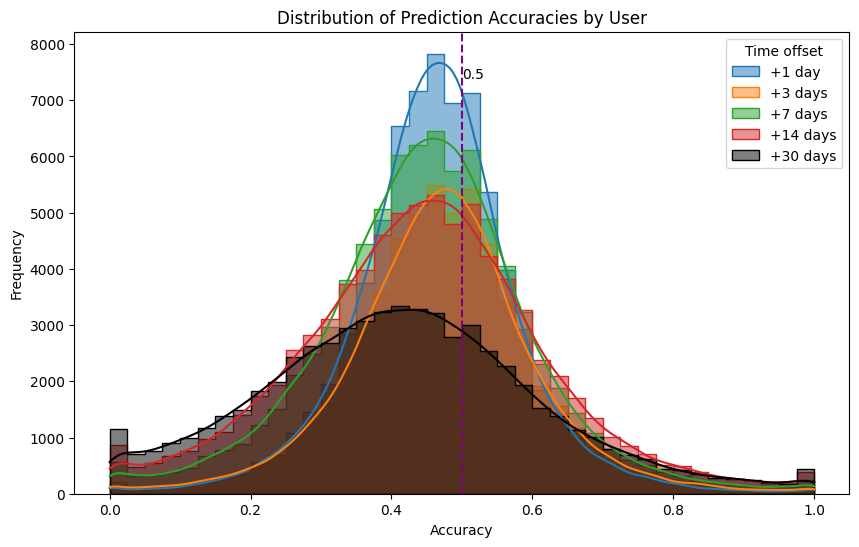

In [134]:
# Example data: replace these with your actual data
data1 = acc_lis[0]['correctness_1']
data2 = acc_lis[1]['correctness_3']
data3 = acc_lis[2]['correctness_7']
data4 = acc_lis[3]['correctness_14']
data5 = acc_lis[4]['correctness_30']

# Create a DataFrame to hold all data for easier plotting with Seaborn
data = pd.DataFrame({
    'accuracy': pd.concat([data1, data2, data3, data4, data5]),
    'timeframe': ['+1 day'] * len(data1) + ['+3 days'] * len(data2) + ['+7 days'] * len(data3) + ['+14 days'] * len(data4) + ['+30 days'] * len(data5)
})

# Plotting the histograms with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['timeframe'] == '+1 day'], x='accuracy', bins=40, kde=True, label='+1 day', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+3 days'], x='accuracy', bins=40, kde=True, label='+3 days', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+7 days'], x='accuracy', bins=40, kde=True, label='+7 days', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+14 days'], x='accuracy', bins=40, kde=True, label='+14 days', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+30 days'], x='accuracy', bins=40, kde=True, label='+30 days', color = 'black',element='step', alpha=0.5)
# Add a vertical line at x=0.5
plt.axvline(x=0.5, color='purple', linestyle='--', linewidth=1.5)
# Add label at x=0.5
plt.text(0.5, plt.gca().get_ylim()[1]*0.9, '0.5', horizontalalignment='left')
# Adding labels and title
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Accuracies by User')

# Explicitly add the legend
plt.legend(title='Time offset')

# Display the plot
plt.show()

In [144]:
accuracy_by_ticker = pd.DataFrame()
for off in [1,3,7,14,30]:
    price_df_shifted = price_df.copy()
    price_df_shifted['date'] -= pd.DateOffset(days=off)
    merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
    df = merged_df_off
    df['correctness'] = 0
    bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
    bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
    df.loc[bullish_condition | bearish_condition, 'correctness'] = 1
    sub = df.set_index('date').groupby(by = ['ticker']).resample('10D')['correctness'].mean().reset_index()
    #sub = df.groupby(by = ['ticker','date'])['correctness'].mean().reset_index()
    sub = sub.rename(columns = {'correctness':f'correctness_{off}'})
    accuracy_by_ticker = pd.concat([accuracy_by_ticker,sub.set_index(['ticker','date'])],axis = 1)

In [147]:
accuracy_by_ticker.head()

correctness_1  correctness_3  correctness_7  \
ticker date                                                      
AAPL   2018-01-02       0.483976       0.698456       0.810782   
       2018-01-12       0.610518       0.438697       0.321987   
       2018-01-22       0.524602       0.187122       0.199448   
       2018-02-01       0.343553       0.314875       0.400780   
       2018-02-11       0.597009       0.739766       0.561807   

                   correctness_14  correctness_30  
ticker date                                        
AAPL   2018-01-02        0.683550        0.168474  
       2018-01-12        0.099330        0.114286  
       2018-01-22        0.297385        0.679859  
       2018-02-01        0.768384        0.685271  
       2018-02-11        0.759148        0.754205

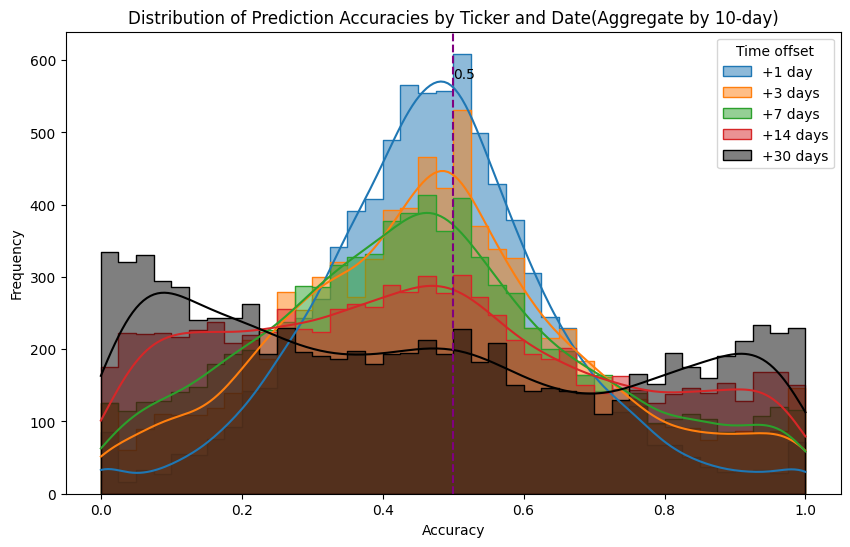

In [148]:
# Example data: replace these with your actual data
data1 = accuracy_by_ticker['correctness_1']
data2 = accuracy_by_ticker['correctness_3']
data3 = accuracy_by_ticker['correctness_7']
data4 = accuracy_by_ticker['correctness_14']
data5 = accuracy_by_ticker['correctness_30']

# Create a DataFrame to hold all data for easier plotting with Seaborn
data = pd.DataFrame({
    'accuracy': pd.concat([data1, data2, data3, data4, data5]),
    'timeframe': ['+1 day'] * len(data1) + ['+3 days'] * len(data2) + ['+7 days'] * len(data3) + ['+14 days'] * len(data4) + ['+30 days'] * len(data5)
})

# Plotting the histograms with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=data[data['timeframe'] == '+1 day'], x='accuracy', bins=40, kde=True, label='+1 day', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+3 days'], x='accuracy', bins=40, kde=True, label='+3 days', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+7 days'], x='accuracy', bins=40, kde=True, label='+7 days', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+14 days'], x='accuracy', bins=40, kde=True, label='+14 days', element='step', alpha=0.5)
sns.histplot(data=data[data['timeframe'] == '+30 days'], x='accuracy', bins=40, kde=True, label='+30 days', color = 'black',element='step', alpha=0.5)
# Add a vertical line at x=0.5
plt.axvline(x=0.5, color='purple', linestyle='--', linewidth=1.5)
# Add label at x=0.5
plt.text(0.5, plt.gca().get_ylim()[1]*0.9, '0.5', horizontalalignment='left')
# Adding labels and title
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Accuracies by Ticker and Date(Aggregate by 10-day)')

# Explicitly add the legend
plt.legend(title='Time offset')

# Display the plot
plt.show()

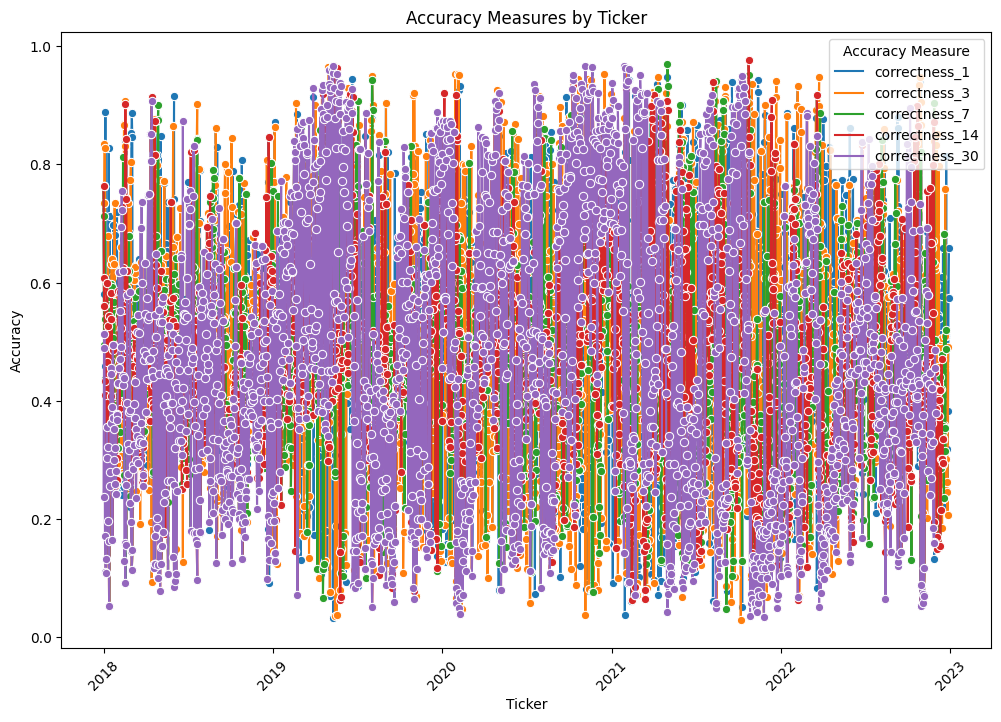

In [135]:
# Melting the DataFrame to a long format
df_melted = accuracy_by_ticker.reset_index().melt(id_vars='date', value_vars=['correctness_1','correctness_3','correctness_7','correctness_14','correctness_30'],
                    var_name='accuracy_measure', value_name='accuracy')

# Creating the plot with a larger figure size
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='date', y='accuracy', hue='accuracy_measure', marker='o')

# Rotating the x-axis labels
plt.xticks(rotation=45)

# Adding labels and title
plt.xlabel('Ticker')
plt.ylabel('Accuracy')
plt.title('Accuracy Measures by Ticker')
plt.legend(title='Accuracy Measure')

# Showing the plot
plt.show()

In [125]:
price_df_shifted = price_df.copy()
price_df_shifted['date'] -= pd.DateOffset(days=1)
merged_df_off=  pd.merge(merged_df, price_df_shifted, on=['date', 'ticker'], suffixes=('', '_future'))
df = merged_df_off
df['correctness'] = 0
bullish_condition = (df['sentiment'] == 1) & (df['price_future'] >= df['price'])
bearish_condition = (df['sentiment'] == -1) & (df['price_future'] < df['price'])
df.loc[bullish_condition | bearish_condition, 'correctness'] = 1

sub = df.set_index('date').groupby(by = ['ticker']).resample('10D')['correctness'].mean().reset_index()
sub = sub.rename(columns = {'correctness':f'correctness_{off}'})

<Axes: xlabel='date', ylabel='correctness_30'>

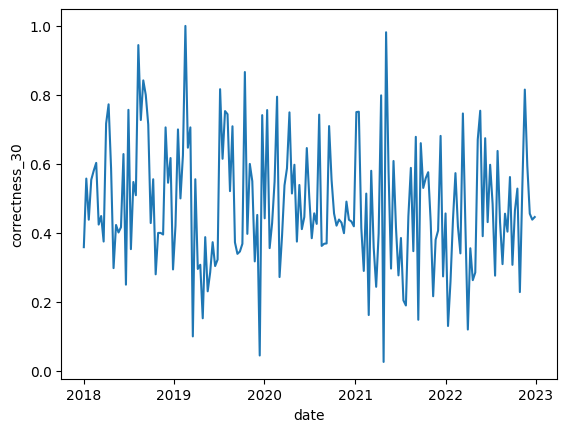

In [130]:
sns.lineplot(data = sub.loc[sub['ticker']=='AMC'], x = 'date',y = 'correctness_30')